----------------------------------------------------------------------------------------------------------------------------------------------------------

In [1]:
#Import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline
plt.style.use('seaborn-white')

In [3]:
d=pd.read_csv('/Users/arsheenkhatib/Desktop/Default.csv', na_values='?').dropna()
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 5 columns):
Unnamed: 0    10000 non-null int64
default       10000 non-null object
student       10000 non-null object
balance       10000 non-null float64
income        10000 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 468.8+ KB


In [4]:
d.describe()

,Unnamed: 0,balance,income
count,10000.00000,10000.000000,10000.000000
mean,5000.50000,835.374886,33516.981876
std,2886.89568,483.714985,13336.639563
min,1.00000,0.000000,771.967729
25%,2500.75000,481.731105,21340.462903
50%,5000.50000,823.636973,34552.644802
75%,7500.25000,1166.308386,43807.729272
max,10000.00000,2654.322576,73554.233495


----------------------------------------------------------------------------------------------------------------------

Validation Set Approach:

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[ 36945.68531338  35348.6689535   32736.10460506 ...,  32368.51846442
  34346.59529949  35382.61232073]
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[ 33838.36066897  32848.70060292  34232.68140514 ...,  31878.77471965
  35273.62549695  35362.26059383]
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[ 34131.68772149  34028.14285129  34460.01542202 ...,  33742.55575511
  31687.71532397  33704.3831471 ]
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[ 35189.265071    31347.63249235  34224.14071447 ...,  32874.02262115
  31142.71761915  30014.20263352]
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[ 31821.45169472  34183.88789925  32940.40142074 ...,  32780.6917223
  32970.06341856  35822.41481395]
LinearRegression(co

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[ 34050.62591607  33902.95143225  34529.48547026 ...,  33512.59349187
  31867.9647031   33462.78712217]
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[ 35577.76393052  31155.36941961  34606.35349286 ...,  32739.4200761
  31026.17254841  30440.63003715]
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[ 32136.58504869  34162.84395596  32972.05131241 ...,  32853.85946488
  32994.55512445  35983.19033996]
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[ 31594.50632446  31477.06313808  35039.98360733 ...,  32806.93379188
  35643.5278895   31302.4320982 ]
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[ 32748.98275023  31634.92833694  36684.75601929 ...,  30626.5872685
  36473.86371218  33141.87658327]
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[ 30910.07631371  34

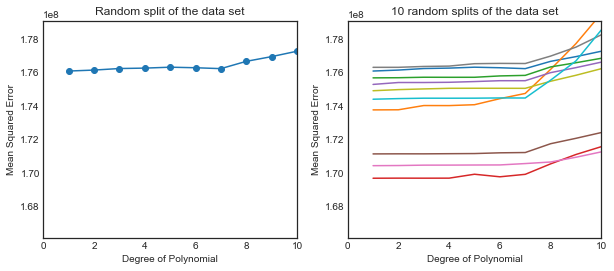

In [7]:
t_prop = 0.5
p_order = np.arange(1,11)
r_state = np.arange(0,10)

X, Y = np.meshgrid(p_order, r_state, indexing='ij')
Z = np.zeros((p_order.size,r_state.size))


regr = skl_lm.LinearRegression()
print(regr)

# Generate 10 random splits of the dataset
for (i,j),v in np.ndenumerate(Z):
    poly = PolynomialFeatures(int(X[i,j]))
    X_poly = poly.fit_transform(d.balance.values.reshape(-1,1))
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, d.income.ravel(),
                                                        test_size=t_prop, random_state=Y[i,j])
    #print(len(X_train), len(y_train))
                                                                        
    regr.fit(X_train, y_train)
    print(regr)
    pred = regr.predict(X_test)
    print(pred)
    Z[i,j]= mean_squared_error(y_test, pred)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

# Left plot (first split)
ax1.plot(X.T[0],Z.T[0], '-o')
ax1.set_title('Random split of the data set')

# Right plot (all splits)
ax2.plot(X,Z)
ax2.set_title('10 random splits of the data set')

for ax in fig.axes:
    ax.set_ylabel('Mean Squared Error')
    ax.set_ylim(166078998,179078998)
    ax.set_xlabel('Degree of Polynomial')
    ax.set_xlim(0,10)
   # ax.set_xticks(range(2,11,2));
    


----------------------------------------------------------------------------------------------------------------------

In [11]:
p_order = np.arange(1,11)
r_state = np.arange(0,10)

# LeaveOneOut CV
regr = skl_lm.LinearRegression()
loo = LeaveOneOut()
loo.get_n_splits(d)
scores = list()

for i in p_order:
    poly = PolynomialFeatures(i)
    X_poly = poly.fit_transform(d.balance.values.reshape(-1,1))
    score = cross_val_score(regr, X_poly, d.income, cv=loo, scoring='neg_mean_squared_error').mean()
    scores.append(score)

In [12]:
# k-fold CV
folds = 10
elements = len(d.income)

X, Y = np.meshgrid(p_order, r_state, indexing='ij')
Z = np.zeros((p_order.size,r_state.size))

regr = skl_lm.LinearRegression()

for (i,j),v in np.ndenumerate(Z):
    poly = PolynomialFeatures(X[i,j])
    X_poly = poly.fit_transform(d.balance.values.reshape(-1,1))
    kf_10 = KFold(n_splits=folds, random_state=Y[i,j])
    Z[i,j] = cross_val_score(regr, X_poly, d.income, cv=kf_10, scoring='neg_mean_squared_error').mean()  


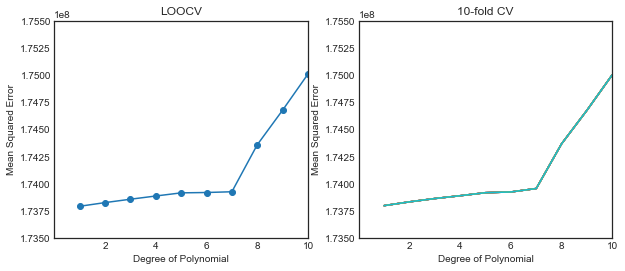

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

# Note: cross_val_score() method return negative values for the scores.
# https://github.com/scikit-learn/scikit-learn/issues/2439

# Left plot
ax1.plot(p_order, np.array(scores)*-1, '-o')
ax1.set_title('LOOCV')

# Right plot
ax2.plot(X,Z*-1)
ax2.set_title('10-fold CV')

for ax in fig.axes:
    ax.set_ylabel('Mean Squared Error')
    ax.set_ylim(173500000,175500000)
    ax.set_xlabel('Degree of Polynomial')
    ax.set_xlim(0,10)
    ax.set_xticks(range(2,11,2));

----------------------------------------------------------------------------------------------------------------------

# Problem 3

In [42]:
# Jupyter setup to expand cell display to 100% width on your screen (optional)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

In [44]:
dataset = pd.read_csv('/Users/arsheenkhatib/Desktop/Hitters.csv',index_col=0).dropna()
dataset.info()
x=dataset.iloc[:,:]
y=dataset.Salary

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 315 to 631
Data columns (total 19 columns):
Hits         263 non-null int64
HmRun        263 non-null int64
Runs         263 non-null int64
RBI          263 non-null int64
Walks        263 non-null int64
Years        263 non-null int64
CAtBat       263 non-null int64
CHits        263 non-null int64
CHmRun       263 non-null int64
CRuns        263 non-null int64
CRBI         263 non-null int64
CWalks       263 non-null int64
League       263 non-null object
Division     263 non-null object
PutOuts      263 non-null int64
Assists      263 non-null int64
Errors       263 non-null int64
Salary       263 non-null float64
NewLeague    263 non-null object
dtypes: float64(1), int64(15), object(3)
memory usage: 41.1+ KB


In [46]:
fill_na = ['League','Division','NewLeague']
dataset.fillna({value:'NaN' for value in fill_na}, inplace=True)
dataset.dropna(how='all')

,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
AtBat,,,,,,,,,,,,,,,,,,,
315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000,N
479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000,A
496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.000,N
321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.500,N
594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.000,A
185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.000,A
298,73,0,24,24,7,3,509,108,0,41,37,12,A,W,121,283,9,100.000,A
323,81,6,26,32,8,2,341,86,6,32,34,8,N,W,143,290,19,75.000,N
401,92,17,49,66,65,13,5206,1332,253,784,890,866,A,E,0,0,0,1100.000,A


In [47]:
dummies = pd.get_dummies(dataset[['League', 'Division', 'NewLeague']])
dummies.info()
print(dummies.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 315 to 631
Data columns (total 6 columns):
League_A       263 non-null uint8
League_N       263 non-null uint8
Division_E     263 non-null uint8
Division_W     263 non-null uint8
NewLeague_A    263 non-null uint8
NewLeague_N    263 non-null uint8
dtypes: uint8(6)
memory usage: 3.6 KB
       League_A  League_N  Division_E  Division_W  NewLeague_A  NewLeague_N
AtBat                                                                      
315           0         1           0           1            0            1
479           1         0           0           1            1            0
496           0         1           1           0            0            1
321           0         1           1           0            0            1
594           1         0           0           1            1            0


In [48]:
y = dataset.Salary
# Drop the column with the independent variable (Salary), and columns for whic
#h we created dummy variables
X = dataset.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
# Define the feature set X.
x = pd.concat([X, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1
)
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 315 to 631
Data columns (total 18 columns):
Hits           263 non-null float64
HmRun          263 non-null float64
Runs           263 non-null float64
RBI            263 non-null float64
Walks          263 non-null float64
Years          263 non-null float64
CAtBat         263 non-null float64
CHits          263 non-null float64
CHmRun         263 non-null float64
CRuns          263 non-null float64
CRBI           263 non-null float64
CWalks         263 non-null float64
PutOuts        263 non-null float64
Assists        263 non-null float64
Errors         263 non-null float64
League_N       263 non-null uint8
Division_W     263 non-null uint8
NewLeague_N    263 non-null uint8
dtypes: float64(15), uint8(3)
memory usage: 33.6 KB


In [49]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print (X_train.shape)
print (X_test.shape)
X_train.head()

(210, 18)
(53, 18)


/Users/arsheenkhatib/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
AtBat,,,,,,,,,,,,,,,,,,
547,137.0,2.0,58.0,47.0,12.0,2.0,1038.0,271.0,3.0,129.0,80.0,24.0,261.0,459.0,22.0,0,1,0
299,75.0,6.0,38.0,23.0,26.0,3.0,580.0,160.0,8.0,71.0,33.0,44.0,212.0,1.0,2.0,1,0,1
584,158.0,15.0,70.0,84.0,42.0,5.0,2358.0,636.0,58.0,265.0,316.0,134.0,331.0,20.0,4.0,1,0,1
381,110.0,9.0,61.0,45.0,32.0,7.0,3015.0,834.0,40.0,451.0,249.0,168.0,228.0,7.0,5.0,1,0,1
255,70.0,7.0,49.0,35.0,43.0,15.0,6311.0,1661.0,154.0,1019.0,608.0,820.0,51.0,54.0,8.0,1,0,1


In [50]:
#Fitting simple linear regression model to the training test
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
#predicting the test set results
y_predict = regressor.predict(X_test)
mean_squared_error(y_test, y_predict)

138295.30912776216

In [52]:
alphas = [0.001, 0.01, 0.1, 1, 10]
print('All errors are RMSE')
print('-'*76)
for alpha in alphas:
    # instantiate and fit model
    ridge = Ridge(alpha=alpha, fit_intercept=True, random_state=99)
    ridge.fit(X_train, y_train)
    # calculate errors
    new_train_error = mean_squared_error(y_train, ridge.predict(X_train))
    new_test_error = mean_squared_error(y_test, ridge.predict(X_test))
    # print errors as report
    print('alpha: {:7} | train error: {:5} | test error: {}'.
          format(alpha,
                 round(new_train_error,3),
                 round(new_test_error,3)))

All errors are RMSE
----------------------------------------------------------------------------
alpha:   0.001 | train error: 87113.913 | test error: 138294.942
alpha:    0.01 | train error: 87113.914 | test error: 138291.645
alpha:     0.1 | train error: 87114.052 | test error: 138259.252
alpha:       1 | train error: 87125.202 | test error: 137985.172
alpha:      10 | train error: 87440.179 | test error: 137108.637


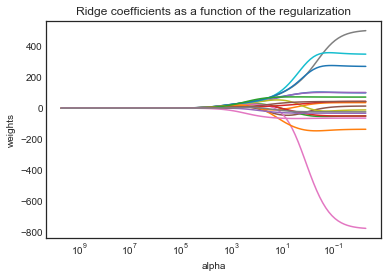

In [53]:
alphas = 10**np.linspace(10,-2,100)*0.5

ridge = Ridge()
coefs = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(x), y)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization');
plt.show()

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

In [55]:
ridge2 = Ridge(alpha=len(x)*11498/2)
ridge2.fit(scaler.transform(X_train), y_train)
pred = ridge2.predict(scaler.transform(X_test))
mean_squared_error(y_test, pred)

182238.57421543452

In [56]:
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgecv.fit(scale(X_train), y_train)

RidgeCV(alphas=array([  5.00000e+09,   3.78232e+09, ...,   6.60971e-03,   5.00000e-03]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring='neg_mean_squared_error', store_cv_values=False)

In [57]:
ridgecv.alpha_

115.50648500415789

In [58]:
ridge2.set_params(alpha=ridgecv.alpha_)
ridge2.fit(scale(X_train), y_train)
mean_squared_error(y_test, ridge2.predict(scale(X_test)))

148289.7593592772

In [59]:
from sklearn.model_selection import cross_val_score

alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1]

val_errors = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha, fit_intercept=True, random_state=77)
    errors = np.sum(-cross_val_score(lasso, x, y, 
                                     scoring='neg_mean_squared_error', 
                                     cv=10, 
                                     n_jobs=-1))
    val_errors.append(np.sqrt(errors))

/Users/arsheenkhatib/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/arsheenkhatib/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/arsheenkhatib/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/arsheenkhatib/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: Converge

In [60]:
print(val_errors)

[1097.0341808367671, 1097.0320367742372, 1097.0106285894501, 1096.7994207169038, 1094.9966366176027, 1091.1748408832493]


In [61]:
print('best alpha: {}'.format(alphas[np.argmin(val_errors)]))

best alpha: 10.0


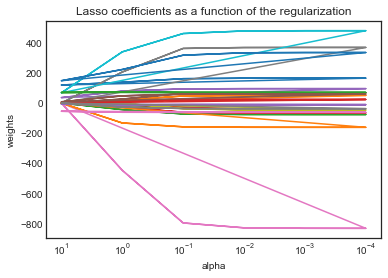

In [65]:
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas*2:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization');
plt.show()

In [66]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=10000)
lassocv.fit(scale(X_train), y_train.as_matrix().ravel())

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=10000, n_alphas=100, n_jobs=1, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [67]:
lassocv.alpha_

25.3911958441265

In [68]:
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X_train), y_train)
mean_squared_error(y_test, lasso.predict(scale(X_test)))

146343.93632244485

In [69]:
pd.Series(lasso.coef_, index=x.columns)

Hits           109.648512
HmRun            0.000000
Runs             0.000000
RBI              0.000000
Walks           33.155243
Years            0.000000
CAtBat           0.000000
CHits            0.000000
CHmRun           0.000000
CRuns           61.223097
CRBI           143.990156
CWalks           0.000000
PutOuts         59.730930
Assists         -0.000000
Errors          -0.000000
League_N         0.000000
Division_W     -41.662206
NewLeague_N      0.000000
dtype: float64